# `Text Classification` sur [AirlineTweets.csv](https://1drv.ms/t/s!AmJGbSlW18YGtYZURtQLf0_cHoHGMQ?e=iV0q54)

In [1]:
!pip install transformers

In [2]:
!pip install torch torchvision torchaudio

# Import

In [1]:
import numpy as np
import pandas as pd
import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data ?

In [2]:
df = pd.read_csv(r'C:\Users\bejao\OneDrive\data\AirlineTweets.txt')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# Keep required columns only ? 

In [3]:
df = df[['airline_sentiment','text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
...,...,...
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


# Check the distribution of classes

<AxesSubplot:>

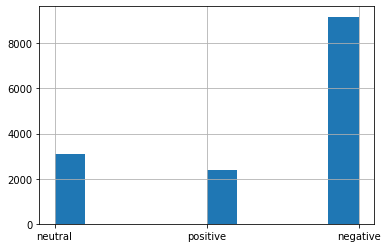

In [7]:
df['airline_sentiment'].hist()
# As we can see this is an imbalanced distribusion of classes. We will see if our model can handle imbalanced dataset or it will biased towards majority class.

# Map classes to the integers

In [4]:
target_map = { 'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)
df

c:\Users\bejao\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,1
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,2
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
4,negative,@VirginAmerica and it's a really big bad thing about it,0
...,...,...,...
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.,1
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,0
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10,2
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",0


# Save data to new csv file ? 

In [9]:
# Because transformers required special format of dataset to perform operations on it, which we will give using load_dataset class. We will see next how dataset required for the transformers.

df1 = df[['text','target']]
df1.columns = ['sentence','label'] # As transformers must required ‘label’ as a target column name. Otherwise it will raise an error
df1.to_csv(r'C:\Users\bejao\OneDrive\data\AirlineTweets_for_TRANSFORMERS.txt', index = False)

# Load datasets librairy

The `!pip install datasets` command installs the `datasets` library, which provides a unified `API` for accessing a variety of publicly available datasets for `NLP` tasks such as `sentiment analysis`, `machine translation`, and `summarization`.

In [10]:
!pip install datasets

In [3]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files = r'C:\Users\bejao\OneDrive\data\AirlineTweets_for_TRANSFORMERS.txt')
raw_dataset
# The “DatasetDict” is a dictionary-like object that contains one dataset named “train”. We can one or more datasets.
# The “Dataset” object represents a single dataset and provides information about the features and structure of the data. The “features” attribute is a list of strings that specifies the names of the features in the dataset. In this case, the dataset has two features: “sentence” and “label”.

Found cached dataset csv (C:/Users/bejao/.cache/huggingface/datasets/csv/default-e57c2bab9d35af71/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d)
100%|██████████| 1/1 [00:00<00:00, 250.87it/s]


DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

# Train test split ? 

In [4]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)
split

Loading cached split indices for dataset at C:\Users\bejao\.cache\huggingface\datasets\csv\default-e57c2bab9d35af71\0.0.0\eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d\cache-e2ea8a393c10d11e.arrow and C:\Users\bejao\.cache\huggingface\datasets\csv\default-e57c2bab9d35af71\0.0.0\eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d\cache-bf37b0bd72b22f6f.arrow


DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

# Tokenize the data ? 

In [5]:
# Import AutoTokenizer and create tokenizer object
from transformers import AutoTokenizer
checkpoint = 'bert-base-cased'
tokernizer = AutoTokenizer.from_pretrained(checkpoint)

# Convert the text into a numerical representation (suitable for input into the Transformer model). 
# This typically involves tokenizing the text into subwords or words, mapping the tokens to integers, and encoding the input as a tensor.

# The code is using the AutoTokenizer class from the transformers library to load a pre-trained tokenizer for the BERT model with the "base" architecture and the "cased" version. The pre-trained tokenizer will be used to convert input sequences of text into numerical representations (tokens) that can be fed into the model. The checkpoint variable specifies the name of the pre-trained tokenizer to use, and the from_pretrained method is used to load the tokenizer from the transformers library's pre-trained models.

# Define tokenizer function

In [6]:
def tokenize_fn(batch):
  return tokernizer(batch['sentence'], truncation = True)

# “def tokenize_fn(batch):” defines the function “tokenize_fn”, which takes a single argument “batch”. The “batch” argument is expected to be a dictionary-like object that contains the text data to be tokenized.

# “return tokernizer(batch[‘sentence’], truncation = True)” returns the result of applying a tokenization function, “tokernizer”, to the “sentence” feature of the “batch” data. The “truncation” argument is set to “True”, which means that the tokenization function will truncate sequences that are longer than the maximum length specified by the model.  

In [7]:
tokenized_dataset = split.map(tokenize_fn, batched = True)

# “split.map(tokenize_fn, batched = True)” applies the “tokenize_fn” function to each example in the “split” dataset, which was obtained by splitting the “raw_dataset” into training and test sets.
# “batched = True” specifies that the tokenization function should be applied to batches of data, rather than to individual examples. This can improve performance by allowing the tokenization to be parallelized.
# After that we will get tokenized data which we can directly feed to our model.

Loading cached processed dataset at C:\Users\bejao\.cache\huggingface\datasets\csv\default-e57c2bab9d35af71\0.0.0\eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d\cache-3e0eefd5865f272c.arrow
Loading cached processed dataset at C:\Users\bejao\.cache\huggingface\datasets\csv\default-e57c2bab9d35af71\0.0.0\eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d\cache-d6d6f7ddae7945f0.arrow


# Choose a pre-trained model ? 

In [8]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# AutoModelForSequenceClassification is a class from the transformers library that implements a sequence classification model, a type of model that is used to predict the class of a sequence of inputs (e.g., a sentence). It uses the AutoModel architecture, which automatically selects the most suitable model architecture for the given task and data

# Trainer is a class that provides a high-level API for training a machine learning model. It can be used to train a model using any torch.nn.Module instance, including models implemented using the transformers library.

# TrainingArguments is a class that defines the arguments used to configure a training run. It includes arguments such as the number of training steps, the learning rate, the batch size, and many others. When using the Trainer class, an instance of TrainingArguments is passed to the constructor to specify the configuration for a training run.

# Define a fine-tuning architecture

In [9]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 3)

# Decide which layers of the pre-trained model to fine-tune, and add additional layers as needed to perform the specific task. For example, for a text classification task, a dense layer with a softmax activation function may be added on top of the pre-trained model to produce class predictions.

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

# Install the `torchinfo` library

In [14]:
!pip install torchinfo

In [10]:
from torchinfo import summary
summary(model)

# Model has more than 108 M parameters and all they are trainable.

Layer (type:depth-idx)                                  Param #
BertForSequenceClassification                           --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 590,592
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           2,307
Total params: 10

# Compile the model

In [17]:
!pip install transformers[torch]

In [11]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

# The above code creates an object of the TrainingArguments class with specified arguments for training a model. The output_dir argument sets the directory where the model and training-related files will be saved. The evaluation_strategy argument sets how often evaluation should be done, and in this case, it's set to be done every epoch.

# The save_strategy argument sets when the model should be saved, and it's set to be saved every epoch. The num_train_epochs argument sets the number of training epochs, and it's set to 3.

# The per_device_train_batch_size argument sets the batch size for training, and it's set to 16. The per_device_eval_batch_size argument sets the batch size for evaluation, and it's set to 64.                                  

# Define evaluation metrics

In [12]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'micro')
  return {'accuracy': acc, 'f1_score': f1}

# The above code defines a function compute_metrics that takes a tuple of logits_and_labels as input and computes two evaluation metrics: accuracy and F1 score.

# The function first unpacks the tuple into logits and labels. Then it calculates the predictions using np.argmax along the last axis of logits. The accuracy is calculated as the mean of the equality of predictions and labels. The F1 score is calculated using the f1_score function from scikit-learn with average='micro'. The accuracy and F1 score are returned as a dictionary.  

# Train the model

In [5]:
trainer = Trainer(model,
                  training_args,
                  train_dataset = tokenized_dataset["train"],
                  eval_dataset = tokenized_dataset["test"],
                  tokenizer=tokernizer,
                  compute_metrics=compute_metrics)

# Train the model on the task-specific data using a suitable number of epochs, and monitor the performance of the model on a validation set. If necessary, adjust the model architecture or training procedure, and repeat the training process until satisfactory performance is achieved.                  


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│ ❱ 1 trainer = Trainer(model,                                                                     │
│   2 │   │   │   │     training_args,                                                             │
│   3 │   │   │   │     train_dataset = tokenized_dataset["train"],                                │
│   4 │   │   │   │     eval_dataset = tokenized_dataset["test"],                                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'Trainer' is not defined

The above code creates an object of the Trainer class and assigns it to the variable trainer. This class is used for training and evaluating a machine learning model.

The Trainer class takes several arguments:

model is the model to be trained.
training_args is an instance of the TrainingArguments class that contains the arguments for training the model.
train_dataset is the training dataset, which is assigned tokenized_dataset["train"] in this case.
eval_dataset is the evaluation dataset, which is assigned tokenized_dataset["test"] in this case.
tokenizer is the tokenizer used for the input data, and it's assigned tokernizer in this case.
compute_metrics is the function used to compute the evaluation metrics, which is compute_metrics in this case.
With these arguments, the Trainer object is configured to train and evaluate the specified model using the specified datasets, tokenizer, and evaluation metrics.

In [4]:
trainer.train()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│ ❱ 1 trainer.train()                                                                              │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'trainer' is not defined

In [ ]:
training_dir

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [1]:
from transformers import pipeline

In [3]:
saved_model = pipeline('text-classification',
                       model = 'training_dir/checkpoint-1282')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ c:\Users\bejao\miniconda3\lib\site-packages\huggingface_hub\utils\_errors.py:261 in              │
│ hf_raise_for_status                                                                              │
│                                                                                                  │
│   258 │   </Tip>                                                                                 │
│   259 │   """                                                                                    │
│   260 │   try:                                                                                   │
│ ❱ 261 │   │   response.raise_for_status()                                                        │
│   262 │   except HTTPError as e:                                                                 │
│   263 │   │   error_code = response.headers.get("X-Error-Code")                                  │
│   264                                                                                            │
│                                                                                                  │
│ c:\Users\bejao\miniconda3\lib\site-packages\requests\models.py:1021 in raise_for_status          │
│                                                                                                  │
│   1018 │   │   │   )                                                                             │
│   1019 │   │                                                                                     │
│   1020 │   │   if http_error_msg:                                                                │
│ ❱ 1021 │   │   │   raise HTTPError(http_error_msg, response=self)                                │
│   1022 │                                                                                         │
│   1023 │   def close(self):                                                                      │
│   1024 │   │   """Releases the connection back to the pool. Once this method has been            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
HTTPError: 401 Client Error: Unauthorized for url: 
https://huggingface.co/training_dir/checkpoint-1282/resolve/main/config.json

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ c:\Users\bejao\miniconda3\lib\site-packages\transformers\utils\hub.py:429 in cached_file         │
│                                                                                                  │
│    426 │   │   │   proxies=proxies,                                                              │
│    427 │   │   │   resume_download=resume_download,                                              │
│    428 │   │   │   use_auth_token=use_auth_token,                                                │
│ ❱  429 │   │   │   local_files_only=local_files_only,                                            │
│    430 │   │   )                                                                                 │
│    431 │                                                                                         │
│    432 │   except RepositoryNotFoundError:                                                       │
│                                                                                                  │
│ c:\Users\bejao\miniconda3\lib\site-packages\huggingface_hub\utils\_validators.py:118 in          │
│ _inner_fn                                                                                        │
│                                                                                                  │
│   115 │   │   if check_use_auth_token:                                                           │
│   116 │   │   │   kwargs = smoothly_deprecate_use_auth_token(

In [2]:
split['test']

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│ ❱ 1 split['test']                                                                                │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'split' is not defined

In [ ]:
prediction = saved_model(split['test']['sentence'])

Disabling tokenizer parallelism, we're using DataLoader multithreading already


In [ ]:
prediction[:10]

[{'label': 'LABEL_1', 'score': 0.9644743204116821},
 {'label': 'LABEL_1', 'score': 0.9196882247924805},
 {'label': 'LABEL_0', 'score': 0.7933976650238037},
 {'label': 'LABEL_2', 'score': 0.5548338294029236},
 {'label': 'LABEL_0', 'score': 0.6752216815948486},
 {'label': 'LABEL_0', 'score': 0.9972395896911621},
 {'label': 'LABEL_2', 'score': 0.981141209602356},
 {'label': 'LABEL_2', 'score': 0.9850448966026306},
 {'label': 'LABEL_2', 'score': 0.9174178242683411},
 {'label': 'LABEL_0', 'score': 0.9984011054039001}]

In [ ]:
def get_label(d):
  return int(d['label'].split('_')[1])
predictions = [get_label(d) for d in prediction]

In [ ]:
print("acc:",accuracy_score(split['test']['label'], predictions))

acc: 0.8376593806921676


In [ ]:
print("f1:",f1_score(split['test']['label'], predictions, average = 'macro'))

f1: 0.7837583256590012


In [ ]:
import seaborn as sns

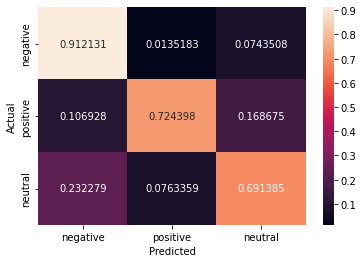

In [ ]:
# create function for plotting confusion matrix
def plot_cm(cm):
  classes = ['negative','positive','neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

cm = confusion_matrix(split['test']['label'],predictions, normalize = 'true')
plot_cm(cm)